# Opdracht 3 -  Data visualisatie en tijdsreeksen analyse

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sn
import numpy as np

In [2]:
data=pd.read_csv('Laagspanning - Woning - Kwartiertotalen.csv',delimiter=';',decimal=',',parse_dates=[['Van (datum)','Van (tijdstip)']])
data.head()

C:\Users\vando\AppData\Local\Temp\ipykernel_20988\2862454868.py:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data=pd.read_csv('Laagspanning - Woning - Kwartiertotalen.csv',delimiter=';',decimal=',',parse_dates=[['Van (datum)','Van (tijdstip)']])


,Van (datum)_Van (tijdstip),Tot (datum),Tot (tijdstip),EAN-code,Meter,Metertype,Register,Volume,Eenheid,Validatiestatus,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,07/10/2021 00:00:00,07/10/2021,00:15:00,5.414500e+17,1SAG3100062337,Digitale meter,Afname,0.434,kWh,Uitgelezen,NaN,NaN,NaN,NaN
1,07/10/2021 00:00:00,07/10/2021,00:15:00,5.414500e+17,1SAG3100062337,Digitale meter,Injectie,0.000,kWh,Uitgelezen,NaN,NaN,NaN,NaN
2,07/10/2021 00:15:00,07/10/2021,00:30:00,5.414500e+17,1SAG3100062337,Digitale meter,Afname,0.568,kWh,Uitgelezen,NaN,NaN,NaN,NaN
3,07/10/2021 00:15:00,07/10/2021,00:30:00,5.414500e+17,1SAG3100062337,Digitale meter,Injectie,0.000,kWh,Uitgelezen,NaN,NaN,NaN,NaN
4,07/10/2021 00:30:00,07/10/2021,00:45:00,5.414500e+17,1SAG3100062337,Digitale meter,Afname,0.655,kWh,Uitgelezen,NaN,NaN,NaN,NaN


In [3]:
data['EAN-code'].unique()

array([5.4145e+17])

In [4]:
data['Eenheid'].unique()

array(['kWh'], dtype=object)

In [5]:
data.columns

Index(['Van (datum)_Van (tijdstip)', 'Tot (datum)', 'Tot (tijdstip)',
       'EAN-code', 'Meter', 'Metertype', 'Register', 'Volume', 'Eenheid',
       'Validatiestatus', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

<Axes: xlabel='count', ylabel='Validatiestatus'>

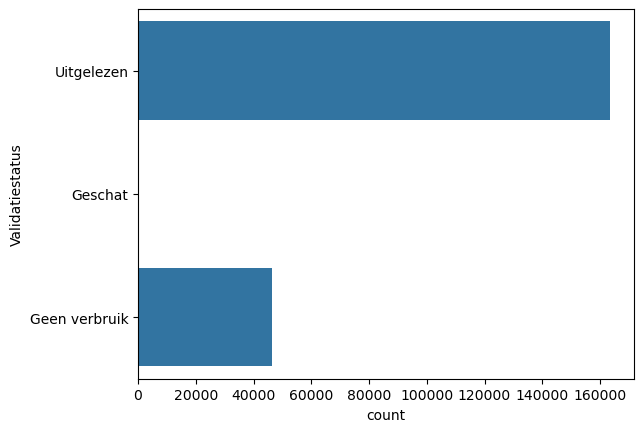

In [6]:
sn.countplot(data['Validatiestatus'])

In [7]:
data=data.drop(['Tot (datum)','Tot (tijdstip)','EAN-code', 'Meter', 'Metertype', 'Eenheid',
       'Validatiestatus', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],axis=1)
data.head()

,Van (datum)_Van (tijdstip),Register,Volume
0,07/10/2021 00:00:00,Afname,0.434
1,07/10/2021 00:00:00,Injectie,0.000
2,07/10/2021 00:15:00,Afname,0.568
3,07/10/2021 00:15:00,Injectie,0.000
4,07/10/2021 00:30:00,Afname,0.655


In [8]:
data['Van (datum)_Van (tijdstip)']=pd.to_datetime(data['Van (datum)_Van (tijdstip)'],format='%d/%m/%Y %H:%M:%S')
data=data.set_index('Van (datum)_Van (tijdstip)')
data.head()

,Register,Volume
Van (datum)_Van (tijdstip),,
2021-10-07 00:00:00,Afname,0.434
2021-10-07 00:00:00,Injectie,0.000
2021-10-07 00:15:00,Afname,0.568
2021-10-07 00:15:00,Injectie,0.000
2021-10-07 00:30:00,Afname,0.655


<Axes: xlabel='Van (datum)_Van (tijdstip)'>

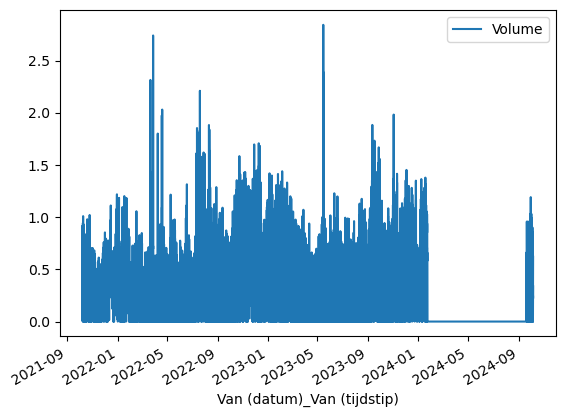

In [9]:
data[data.Register=='Afname'].plot()

<Axes: xlabel='Van (datum)_Van (tijdstip)'>

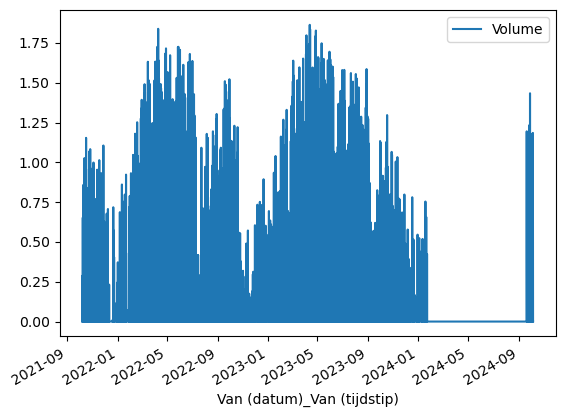

In [10]:
data[data.Register=='Injectie'].plot()

In [11]:
# Data selecteren voor jaren 2022 en 2023
data=data[(data.index>='2022-01-01 00:00:00') & (data.index<'2024-01-01 00:00:00') ]
data.index.min()

Timestamp('2022-01-01 00:00:00')

In [12]:
data.index.max()

Timestamp('2023-12-31 23:45:00')

<Axes: xlabel='Van (datum)_Van (tijdstip)'>

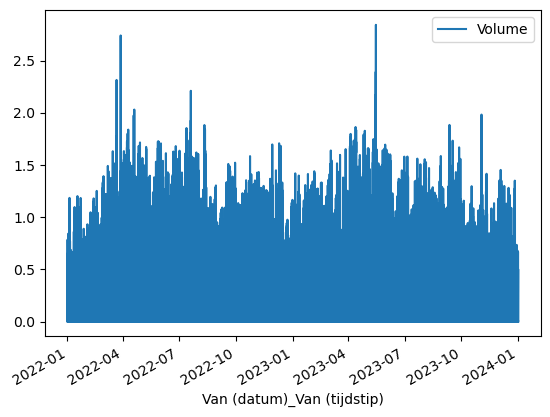

In [13]:
data.plot()

In [14]:
data.head()

,Register,Volume
Van (datum)_Van (tijdstip),,
2022-01-01 00:00:00,Afname,0.451
2022-01-01 00:00:00,Injectie,0.000
2022-01-01 00:15:00,Afname,0.483
2022-01-01 00:15:00,Injectie,0.000
2022-01-01 00:30:00,Afname,0.455


In [15]:
datafr=data[data.Register=='Afname']
datafr.head()

,Register,Volume
Van (datum)_Van (tijdstip),,
2022-01-01 00:00:00,Afname,0.451
2022-01-01 00:15:00,Afname,0.483
2022-01-01 00:30:00,Afname,0.455
2022-01-01 00:45:00,Afname,0.479
2022-01-01 01:00:00,Afname,0.451


In [16]:
datafr=datafr.drop('Register',axis=1)
datafr.head()

,Volume
Van (datum)_Van (tijdstip),
2022-01-01 00:00:00,0.451
2022-01-01 00:15:00,0.483
2022-01-01 00:30:00,0.455
2022-01-01 00:45:00,0.479
2022-01-01 01:00:00,0.451


In [17]:
datafr=datafr.rename(columns={'Volume':'Afname'})
datafr.head()

,Afname
Van (datum)_Van (tijdstip),
2022-01-01 00:00:00,0.451
2022-01-01 00:15:00,0.483
2022-01-01 00:30:00,0.455
2022-01-01 00:45:00,0.479
2022-01-01 01:00:00,0.451


In [18]:
datafr['Injectie']=data[data.Register=='Injectie'].Volume
datafr.head()

,Afname,Injectie
Van (datum)_Van (tijdstip),,
2022-01-01 00:00:00,0.451,0.0
2022-01-01 00:15:00,0.483,0.0
2022-01-01 00:30:00,0.455,0.0
2022-01-01 00:45:00,0.479,0.0
2022-01-01 01:00:00,0.451,0.0


In [19]:
datafr['Mismatch']=datafr.Afname-datafr.Injectie
datafr.head()

,Afname,Injectie,Mismatch
Van (datum)_Van (tijdstip),,,
2022-01-01 00:00:00,0.451,0.0,0.451
2022-01-01 00:15:00,0.483,0.0,0.483
2022-01-01 00:30:00,0.455,0.0,0.455
2022-01-01 00:45:00,0.479,0.0,0.479
2022-01-01 01:00:00,0.451,0.0,0.451


(19188.0, 19190.0)

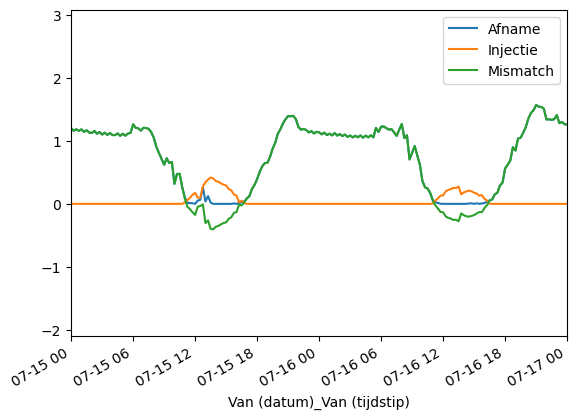

In [20]:
datafr.plot()
plt.xlim(['2022-07-15','2022-07-17'])

## Seasonal decomposition

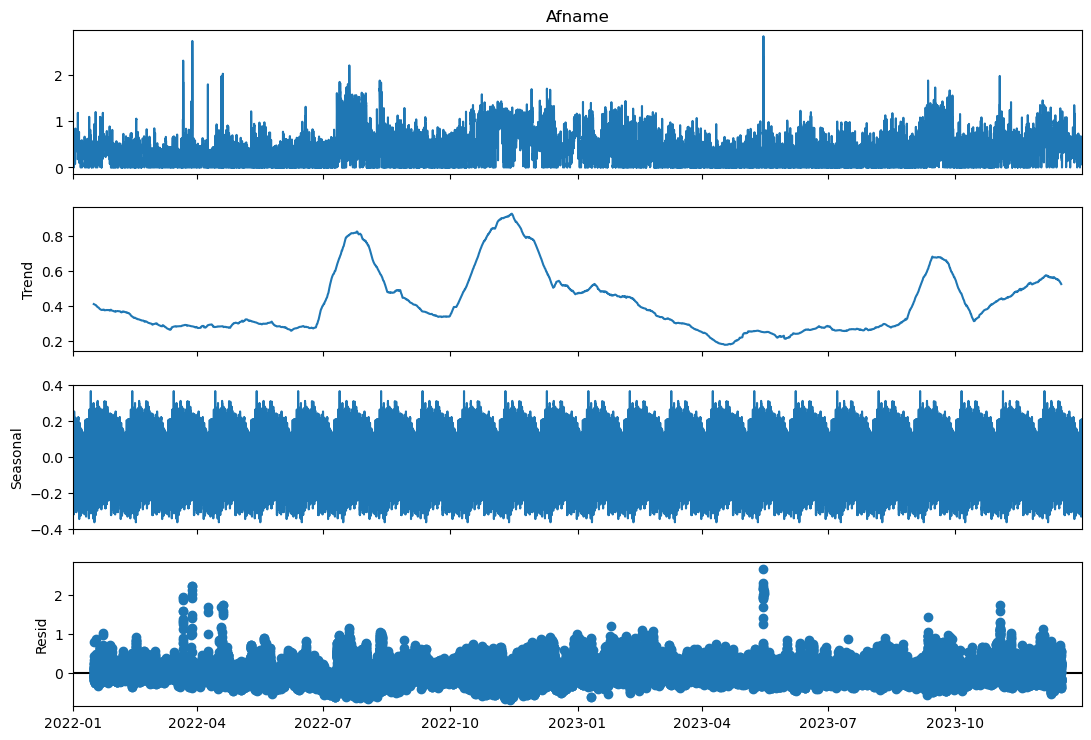

In [23]:
afname=seasonal_decompose(datafr.Afname,model='Additive',period=96*30)
fig = afname.plot()
fig.set_size_inches(12, 8)
plt.show()


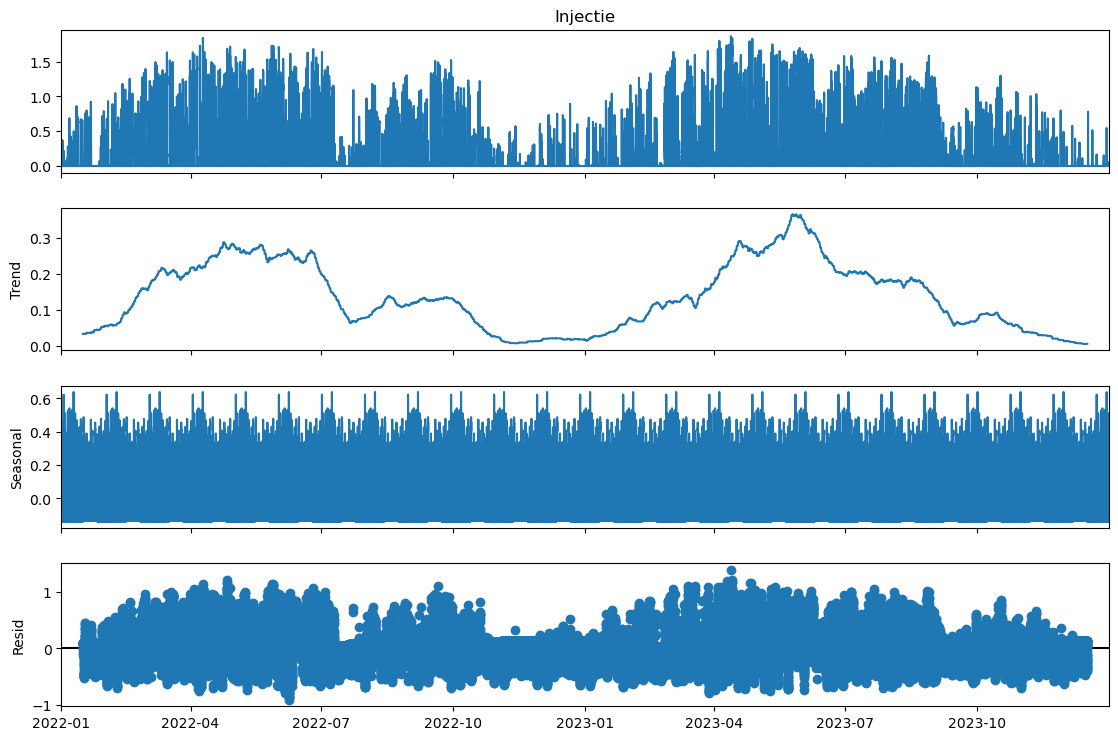

In [24]:
injectie=seasonal_decompose(datafr.Injectie,model='Additive',period=96*30)
fig = injectie.plot()
fig.set_size_inches(12, 8)
plt.show()

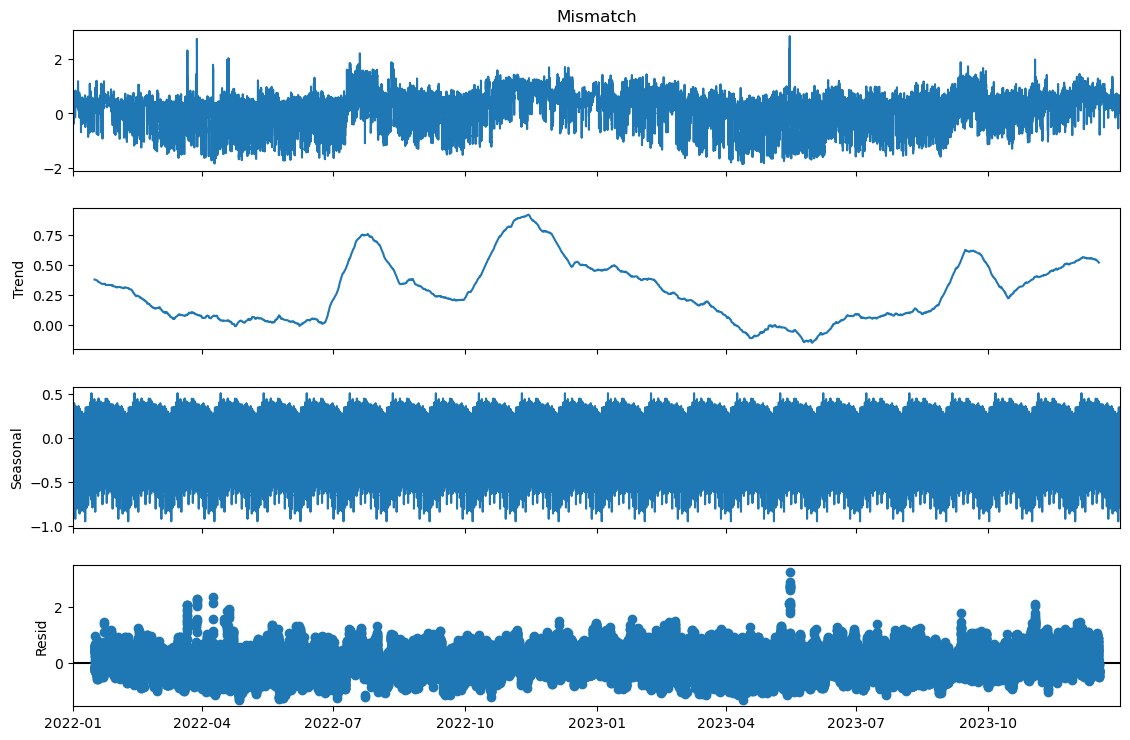

In [25]:
Mismatch=seasonal_decompose(datafr.Mismatch,model='Additive',period=96*30)
fig = Mismatch.plot()
fig.set_size_inches(12, 8)
plt.show()

## Kansdichtheid

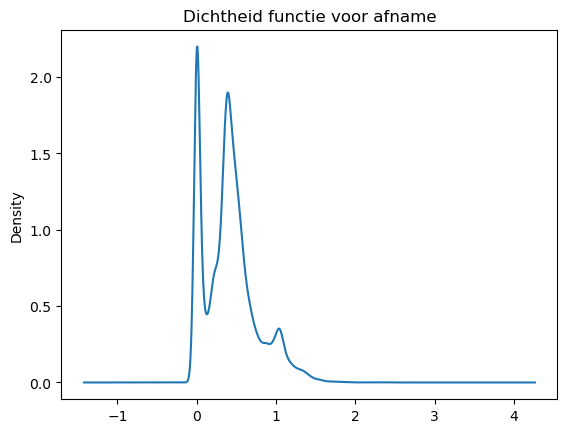

In [22]:
datafr.Afname.plot(kind='kde',title='Dichtheid functie voor afname')
plt.show()

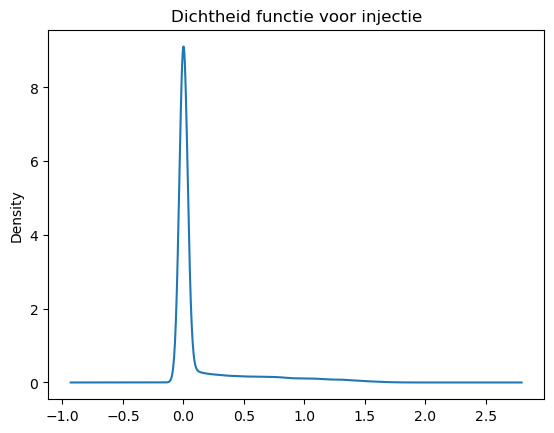

In [26]:
datafr.Injectie.plot(kind='kde',title='Dichtheid functie voor injectie')
plt.show()

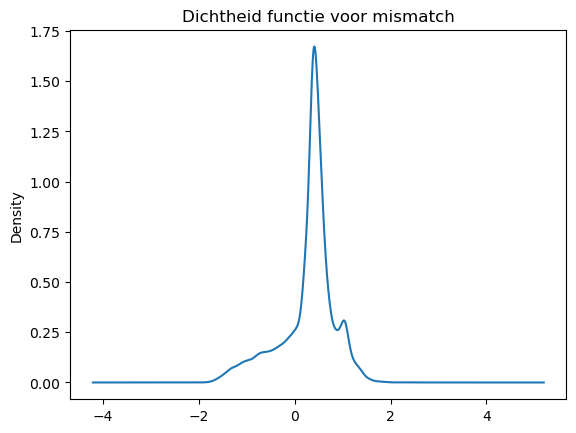

In [27]:
datafr.Mismatch.plot(kind='kde',title='Dichtheid functie voor mismatch')
plt.show()

## Duurcurve

Text(0, 0.5, 'Vermogen [kW]')

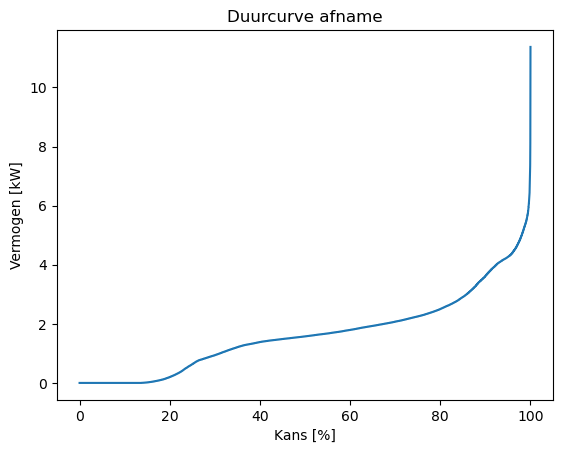

In [29]:
gesorted_data=datafr.Afname.multiply(4).sort_values(ascending=False)
exc_kans=np.arange(1,len(gesorted_data)+1/len(gesorted_data))
exc_kans=100*(1-exc_kans/len(gesorted_data))
plt.plot(exc_kans,gesorted_data)
plt.title('Duurcurve afname')
plt.xlabel('Kans [%]')
plt.ylabel('Vermogen [kW]')

Text(0, 0.5, 'Vermogen [kW]')

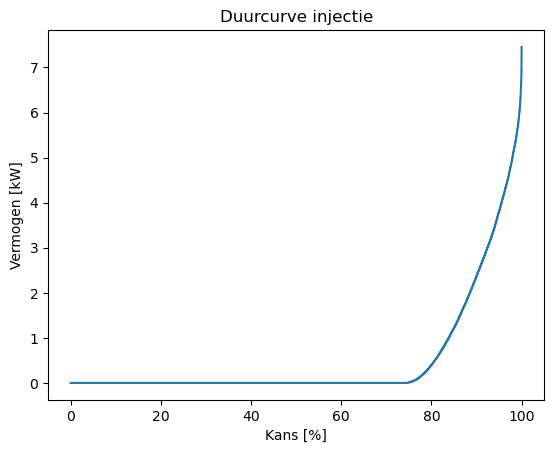

In [30]:
gesorted_data=datafr.Injectie.multiply(4).sort_values(ascending=False)
exc_kans=np.arange(1,len(gesorted_data)+1/len(gesorted_data))
exc_kans=100*(1-exc_kans/len(gesorted_data))
plt.plot(exc_kans,gesorted_data)
plt.title('Duurcurve injectie')
plt.xlabel('Kans [%]')
plt.ylabel('Vermogen [kW]')

Text(0, 0.5, 'Vermogen [kW]')

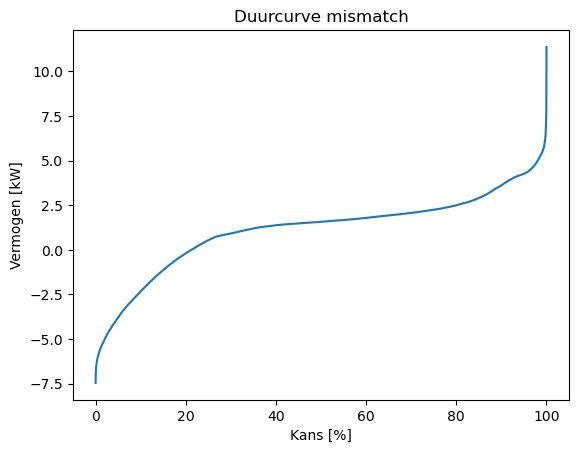

In [31]:
gesorted_data=datafr.Mismatch.multiply(4).sort_values(ascending=False)
exc_kans=np.arange(1,len(gesorted_data)+1/len(gesorted_data))
exc_kans=100*(1-exc_kans/len(gesorted_data))
plt.plot(exc_kans,gesorted_data)
plt.title('Duurcurve mismatch')
plt.xlabel('Kans [%]')
plt.ylabel('Vermogen [kW]')

## Autocorrelatie

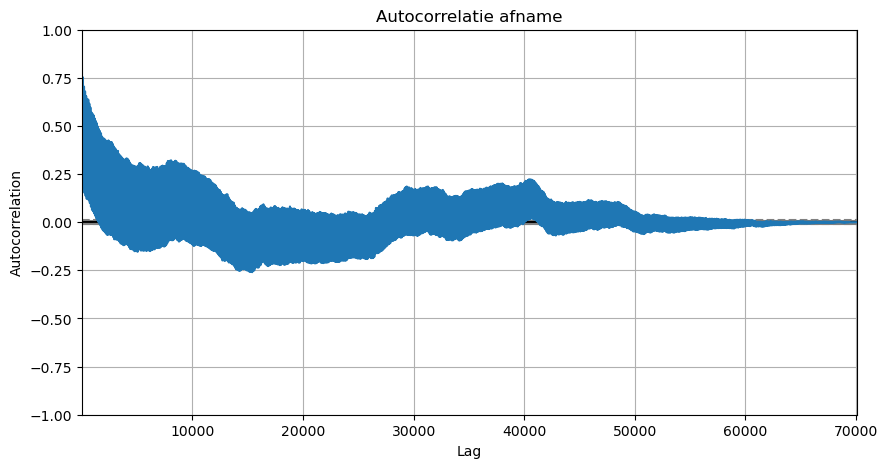

In [33]:
# from statsmodels.graphics.tsaplots import plot_acf
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 5))
autocorrelation_plot(datafr.Afname)
plt.title(f'Autocorrelatie afname')
plt.show()
# plot_acf(datafr.Afname,lags=25,alpha=0.05)

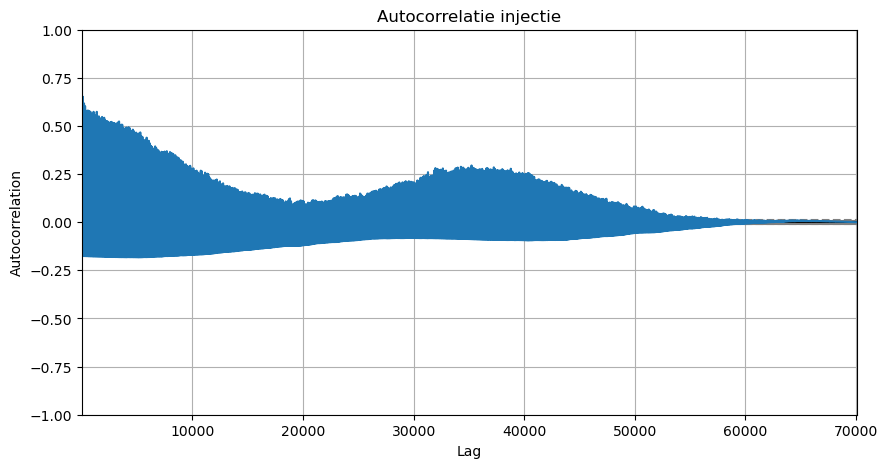

In [34]:
plt.figure(figsize=(10, 5))
autocorrelation_plot(datafr.Injectie)
plt.title(f'Autocorrelatie injectie')
plt.show()

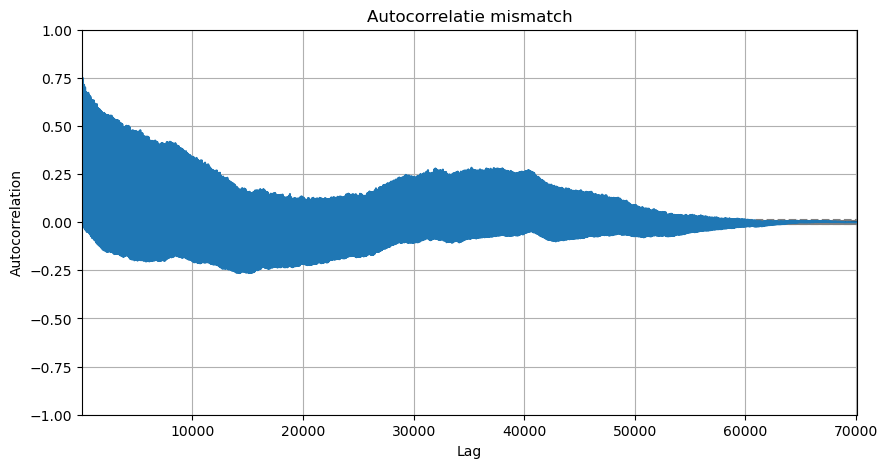

In [35]:
plt.figure(figsize=(10, 5))
autocorrelation_plot(datafr.Mismatch)
plt.title(f'Autocorrelatie mismatch')
plt.show()

## Uren en dagen van de week met hoogste en laagste verbruik

Uur met hoogste gemiddeld verbruik: 21:00
Uur met laagste gemiddeld verbruik: 13:00
Weekdag met hoogste gemiddeld verbruik: 0 (Maandag)
Weekdag met laagste gemiddeld verbruik: 2 (Woensdag)


C:\Users\vando\AppData\Local\Temp\ipykernel_20988\3367345268.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_consumption.index, y=hourly_consumption.values, palette="viridis")
C:\Users\vando\AppData\Local\Temp\ipykernel_20988\3367345268.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_consumption.index, y=weekday_consumption.values, palette="viridis")


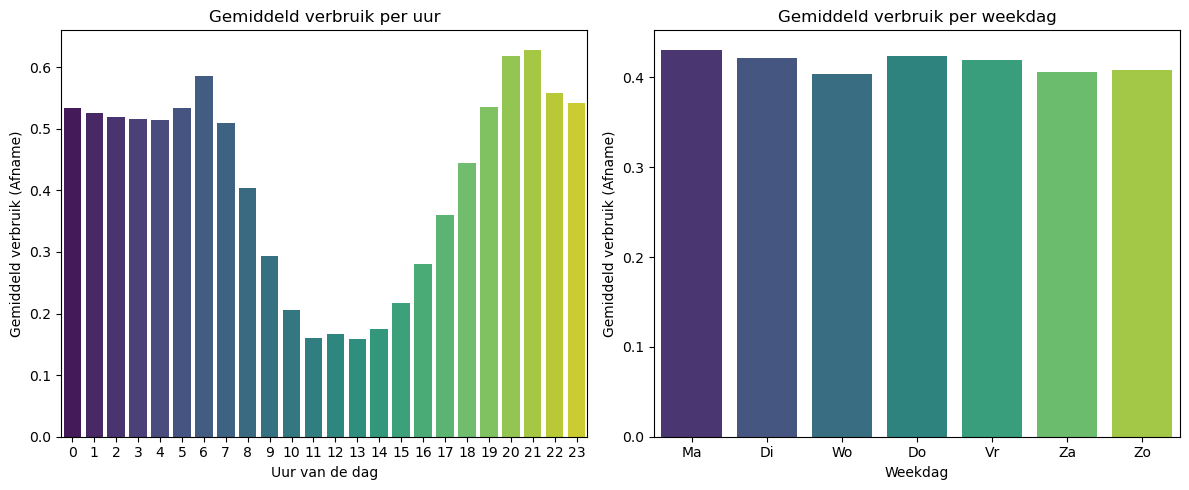

In [40]:
import seaborn as sns
# Zorg dat de index van datafr een datetime-index is
datafr.index = pd.to_datetime(datafr.index)

# Voeg kolommen toe voor uur (0-23) en weekdag (0=maandag, 6=zondag)
datafr['hour'] = datafr.index.hour
datafr['weekday'] = datafr.index.dayofweek

weekday_names = {0: 'Maandag', 1: 'Dinsdag', 2: 'Woensdag', 3: 'Donderdag', 4: 'Vrijdag', 5: 'Zaterdag', 6: 'Zondag'}


# Bereken het gemiddelde verbruik per uur en per weekdag
hourly_consumption = datafr.groupby('hour')['Afname'].mean()
weekday_consumption = datafr.groupby('weekday')['Afname'].mean()

# Bepaal het uur en de weekdag met het hoogste en laagste verbruik
max_hour = hourly_consumption.idxmax()
min_hour = hourly_consumption.idxmin()
max_weekday = weekday_consumption.idxmax()
min_weekday = weekday_consumption.idxmin()

print(f"Uur met hoogste gemiddeld verbruik: {max_hour}:00")
print(f"Uur met laagste gemiddeld verbruik: {min_hour}:00")
print(f"Weekdag met hoogste gemiddeld verbruik: {max_weekday} ({weekday_names[max_weekday]})")
print(f"Weekdag met laagste gemiddeld verbruik: {min_weekday} ({weekday_names[min_weekday]})")

# Visualisatie: Gemiddeld verbruik per uur en per weekdag
plt.figure(figsize=(12, 5))

# Gemiddeld verbruik per uur
plt.subplot(1, 2, 1)
sns.barplot(x=hourly_consumption.index, y=hourly_consumption.values, palette="viridis")
plt.xlabel('Uur van de dag')
plt.ylabel('Gemiddeld verbruik (Afname)')
plt.title('Gemiddeld verbruik per uur')

# Gemiddeld verbruik per weekdag
plt.subplot(1, 2, 2)
weekday_labels = ['Ma', 'Di', 'Wo', 'Do', 'Vr', 'Za', 'Zo']
sns.barplot(x=weekday_consumption.index, y=weekday_consumption.values, palette="viridis")
plt.xlabel('Weekdag')
plt.ylabel('Gemiddeld verbruik (Afname)')
plt.title('Gemiddeld verbruik per weekdag')
plt.xticks(ticks=range(7), labels=weekday_labels)

plt.tight_layout()
plt.show()

## Geef je observaties.


### Observaties

1. **Duurcurve**  
   - We kunnen zien dat we bij afname in ongeveer 45% van de gevallen een afname van meer dan 2 kW hebben.  
   - Bij injectie hebben we in 20% van de gevallen een waarde boven de 0.  
   - Bij mismatch kunnen we zien dat we in 75% van de gevallen afnemen in plaats van injecteren.  

2. **Kansdichtheidsverdeling**  
   - Bij afname zien we twee pieken: één rond 0 en één rond 0.5, met een kleine piek rond 1.  
   - Voor injectie is er een piek rond 0, en we zien aan de rechterkant een lage maar constante lijn net boven 0, die doorloopt tot ongeveer 1.5.  
   - Bij mismatch is er een piek rond 0, maar ook waarden tot -2 en tot ongeveer +1 met een lage dichtheid.  

3. **Autocorrelatie**  
   - Bij afname is de autocorrelatie redelijk hoog tot ongeveer 10.000, waarna het afvlakt, maar er nog enige variatie is tot ongeveer 50.000, waar het volledig afvlakt.  
   - Bij injectie is er in het begin een grote variatie in autocorrelatie, die daarna afvlakt. Tussen 30.000 en 40.000 zien we opnieuw een stijging, waarna het afvlakt rond 50.000.  
   - Mismatch is een combinatie van de autocorrelatie van afname en injectie. Het patroon is dunner dan bij injectie, maar vertoont dezelfde stijgingen op vergelijkbare plaatsen.  

4. **Seasonal decomposition**  
   - We kunnen zien dat er seizoenspatronen in de data aanwezig zijn.  
   - Over het algemeen lijkt de data stationair te zijn.  

5. **Uren en dagen met hoogste en laagste verbruik**  
   - **Uur**: Het hoogste verbruik treedt 's avonds op, wat logisch is omdat de meeste mensen rond 17:00 uur klaar zijn met werken en beginnen met koken, etc.  
     Het laagste verbruik wordt rond de middag waargenomen, wat mogelijk te maken heeft met het feit dat veel mensen dan aan het werken zijn of op school zijn.  
   - **Weekdag**: Het verbruik per dag is ongeveer gelijk, met een iets lager verbruik op woensdag en in het weekend. Voor het weekend is het logisch waarom maar ik zie nie direct in waarom de woensdag ook lager is. 
